# 선형회귀

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [91]:
from sklearn.datasets import load_iris
data = load_iris().data
print(type(data))
print(data.shape)
data[:5]

<class 'numpy.ndarray'>
(150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [24]:
load_iris().items()

dict_items([('data', array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4,

In [27]:
print(load_iris().DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## 단순선형회귀

In [ ]:
x = data[:, 0]
y = data[:, 2]
print(x[:5])
y

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)
print(x_train.shape)
y_train.shape

(105,)


(105,)

In [69]:
model = LinearRegression()
model.fit(x_train.reshape(-1, 1), y_train)
y_predict = model.predict(x_test.reshape(-1, 1))
score = model.score(x_test.reshape(-1, 1), y_test)

In [70]:
w = model.coef_
print(w)
print(model.intercept_)

[1.78391259]
-6.606032125724342


In [71]:
score

0.7916126064993791

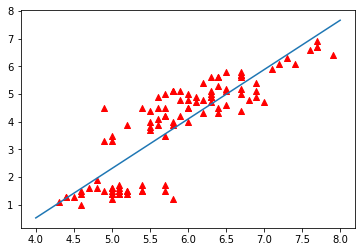

In [76]:
plt.scatter(x_train, y_train, marker='^', c='r')
XX=np.linspace(4, 8, 3)
plt.plot(XX, w*XX+model.intercept_)

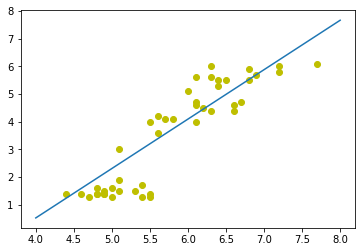

In [79]:
plt.scatter(x_test, y_test, marker='o', c='y')
XX=np.linspace(4, 8, 3)
plt.plot(XX, w*XX+model.intercept_)

## 다중선형회귀

In [95]:
x_train, x_test, y_train, y_test = train_test_split(data[:, :3], data[:, 3], test_size=.2)
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
w = model.coef_
b = model.intercept_

In [96]:
print(score)
print(f'y = {w[0]:.2f}*x1 + {w[1]:.2f}*x2 + {w[2]:.2f}*x3 + {b:.2f}')

0.9476485484770872
y = -0.21*x1 + 0.20*x2 + 0.52*x3 + -0.15


# 교차검증

In [89]:
from sklearn.model_selection import cross_val_score, KFold

In [107]:
cv_KF = KFold(5, shuffle=True)
model = LinearRegression()
score = cross_val_score(model, data[:, 0].reshape(-1, 1), data[:, 2], cv=cv_KF)

In [117]:
for i in range(5):
    print(i+1, ':', score[i])

1 : 0.8174266827637849
2 : 0.8352450338549142
3 : 0.7449398092045194
4 : 0.5696376192748567
5 : 0.7142689931352066
